# **Importing the libraries and loading the data**

In [0]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter

In [2]:
cd '/content/drive/My Drive/Colab Notebooks/dw_matrix_road_signs'

/content/drive/My Drive/Colab Notebooks/dw_matrix_road_signs


In [7]:
train = pd.read_pickle('data/train.p')
train.keys()

dict_keys(['coords', 'labels', 'features', 'sizes'])

In [10]:
X_train, y_train = train['features'], train['labels']
X_train.shape, y_train.shape

((34799, 32, 32, 3), (34799,))

# **Visualising the signs images**

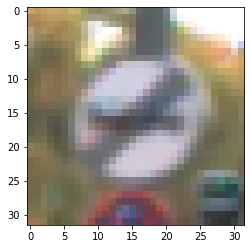

In [15]:
plt.imshow(X_train[100]);

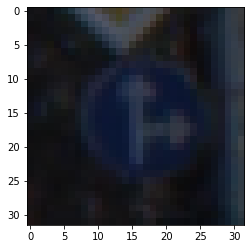

In [16]:
plt.imshow(X_train[1000]);

In [17]:
signs = pd.read_csv('data/signnames.csv')
signs.head()

,a,b
0,0,Speed limit (20km/h)
1,1,Speed limit (30km/h)
2,2,Speed limit (50km/h)
3,3,Speed limit (60km/h)
4,4,Speed limit (70km/h)


In [20]:
dict_signs = signs.to_dict()['b']
dict_signs[30]

'Beware of ice/snow'

In [27]:
for id_sign in dict_signs.keys():
  given_signs = X_train[ y_train == id_sign]

  plt.figure(figsize=(15,5))
  for i in range(9):
    plt.subplot('19{0}'.format(i+1))
    plt.imshow( given_signs[i] )
    plt.axis('off')

plt.tight_layout()
plt.show()

Output hidden; open in https://colab.research.google.com to view.

We can see that some of the images are of better quality and it is obvious which signs are presented on that images, while others are of worse quality and we cannot distinguish them at first glance.

# **How many images of each sign do we have?**

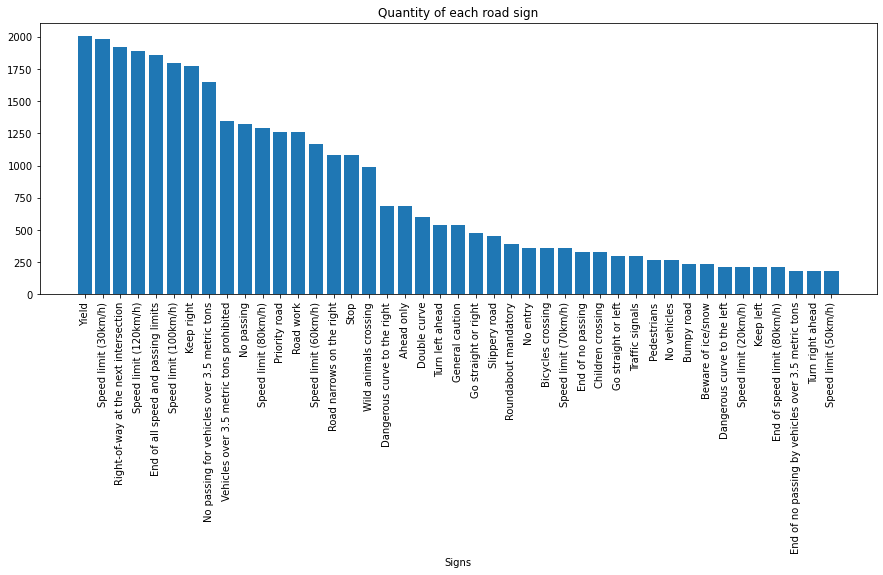

In [44]:
cnt = Counter(y_train).most_common()

id_labels, cnt_labels = zip(*cnt)

ids = range(len(id_labels))

plt.figure(figsize=(15,5))
plt.bar(ids, cnt_labels)

plt.xlabel('Signs')
labels = [dict_signs[ id_labels[id_] ] for id_ in id_labels]
plt.xticks(ids, labels, rotation='vertical')

plt.title('Quantity of each road sign')
plt.show()

We see that we have imbalanced collection of images. The most popular sign is 'Yield'.